In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)
from sklearn.metrics import f1_score, silhouette_score
from sklearn.metrics.cluster import rand_score, adjusted_rand_score ,v_measure_score
from sklearn.model_selection import train_test_split

#from data import *
from helpers import *


In [7]:
# Automated way to create labeled dataset
#directory='/../data_gated/'
#columns=['FSC-H', 'SSC-H', 'B530-H', 'B572-H', 'B675-H']
#create_labeled_dataset(directory,columns,label_gated=3,label_not_gated=1)

In [8]:
file = '../labeled_dataset/GL53_UP_1A.csv'
columns=['B530-H', 'B530-A','B675-H','B572-H','Width']
X,y = preprocess(file,columns)

../labeled_dataset/GL53_UP_1A.csv


In [9]:
X.shape

(1359, 5)

In [10]:
X.to_csv('../labeled_dataset/flowSOM_GL53_UP_1A.csv')

In [12]:
from flowsom import *
from sklearn.cluster import AgglomerativeClustering

file = '../labeled_dataset/flowSOM_GL53_UP_1A.csv'
columns=['B530-H', 'B530-A','B675-H','B572-H','Width']
fsom = flowsom(file, if_fcs=False, if_drop=True, drop_col=['Unnamed: 0'])
fsom.som_mapping(50, 50, 5, sigma=2.5, 
                 lr=0.1, batch_size=100)  # trains SOM with 100 iterations
fsom.meta_clustering(AgglomerativeClustering, min_n=40, 
                     max_n=45, 
                     iter_n=3) # train the meta clustering for cluster in range(40,45)    

Training...
 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.8728088167950417

...ready!


40
0 samples done...


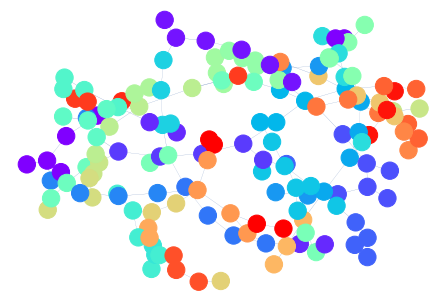

In [13]:
fsom.vis(t=4, # the number of total nodes = t * bestk
       edge_color='b', 
       node_size=300, 
       with_labels=False)
# plt.savefig('mst.png')
fsom.labeling()

In [14]:
output_df = fsom.df # new column added: category
output_tf_df = fsom.tf_df # new column added: category
output_df

B530-H    B530-A    B675-H    B572-H     Width  category
0    -0.474091 -0.404480  1.334022  0.999182 -0.197554        22
1     1.728859  1.713399  0.017838  1.021829  1.561027        23
2     0.976026  0.977343 -0.765197  0.204690  1.045261        37
3     0.535290  0.602418  1.282709  1.122708  0.867374        37
4    -0.440517 -0.434348  1.277750  0.737162 -0.354678        22
...        ...       ...       ...       ...       ...       ...
1354  0.558394  0.584444  0.237374  0.413534  0.680649        17
1355 -0.396269 -0.370310 -0.497426 -0.609541 -0.197554        14
1356 -0.279430 -0.834487 -0.635217 -0.716704 -1.170665        30
1357 -0.109532 -0.055401  0.104756 -0.077991  0.178679        18
1358 -0.187516 -0.157566  0.855511  0.376368  0.036805        22

[1359 rows x 6 columns]

In [15]:
run_eval(output_df,y,output_df['category'])

Rand Index: 0.530
Adjusted Rand Index: 0.081
Homogeneity: 0.369
Completeness: 0.107
V-measure: 0.166
Adjusted Mutual Information: 0.161
Silhouette Coefficient: 0.625


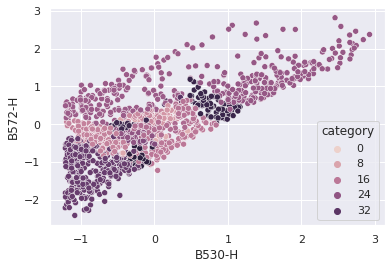

In [16]:

pl = sns.scatterplot(data=output_df, x="B530-H", y="B572-H", hue=output_df['category'])

../labeled_dataset/GL53_UP_3A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL53_UP_3A.csv
(1729, 5)
F1-score: 0.000
Rand Index: 0.822
Adjusted Rand Index: 0.643
V-measure: 0.533
../labeled_dataset/GL59_DN_2A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL59_DN_2A.csv
(14689, 5)
F1-score: 0.000
Rand Index: 0.564
Adjusted Rand Index: 0.041
V-measure: 0.053
../labeled_dataset/GL53_UP_1A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL53_UP_1A.csv
(1359, 5)
F1-score: 0.000
Rand Index: 0.515
Adjusted Rand Index: 0.000
V-measure: 0.000
../labeled_dataset/GL59_DN_3A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL59_DN_3A.csv
(13424, 5)
F1-score: 0.000
Rand Index: 0.565
Adjusted Rand Index: 0.038
V-measure: 0.043
../labeled_dataset/GL53_UP_2A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL53_UP_2A.csv
(1860, 5)
F1-score: 0.000
Rand Index: 0.795
Adjusted Rand Index: 0.591


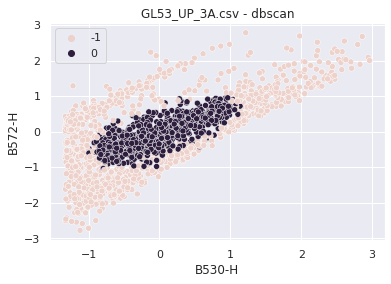

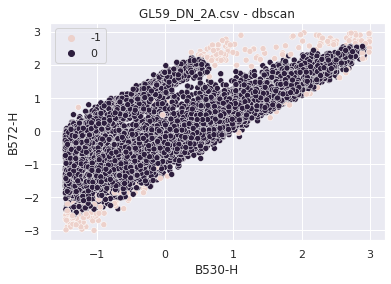

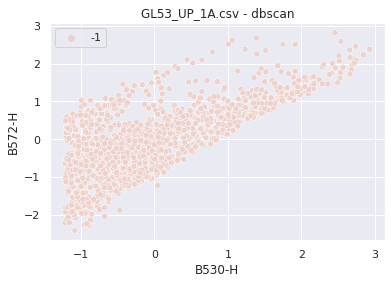

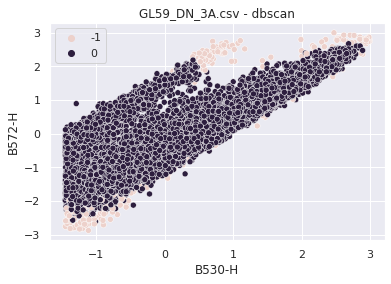

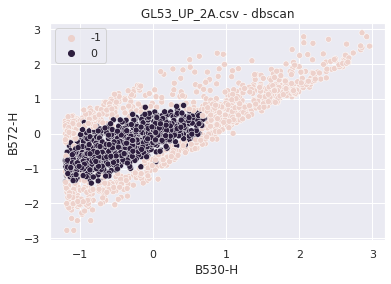

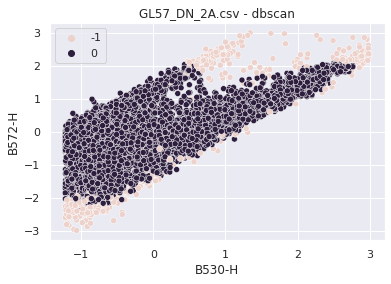

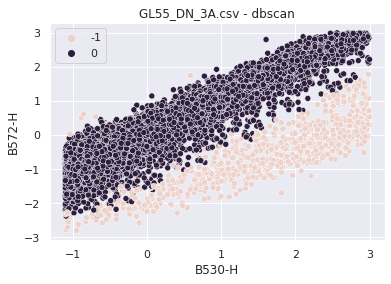

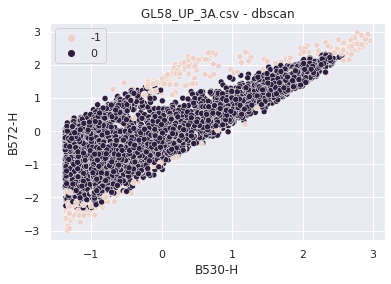

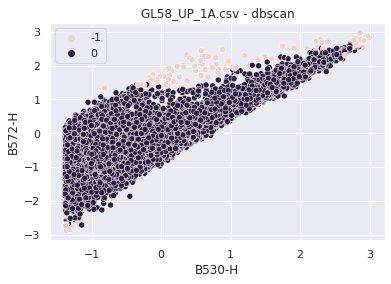

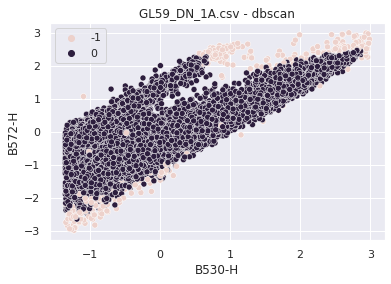

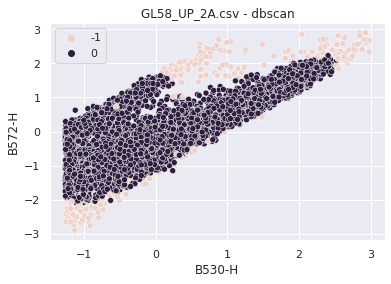

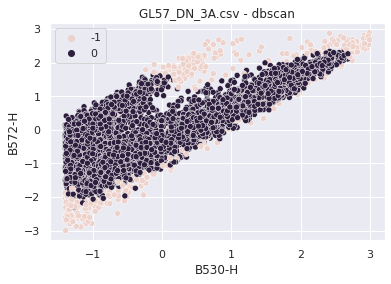

In [6]:
run_all(columns,clustering="dbscan")

../labeled_dataset/GL53_UP_3A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL53_UP_3A.csv
../labeled_dataset/GL59_DN_2A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL59_DN_2A.csv
../labeled_dataset/GL53_UP_1A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL53_UP_1A.csv
../labeled_dataset/GL59_DN_3A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL59_DN_3A.csv
../labeled_dataset/GL53_UP_2A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL53_UP_2A.csv
../labeled_dataset/GL57_DN_2A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL57_DN_2A.csv
../labeled_dataset/GL55_DN_3A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL55_DN_3A.csv
../labeled_dataset/GL58_UP_3A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL58_UP_3A.csv
../labeled_dataset/GL58_UP_1A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks

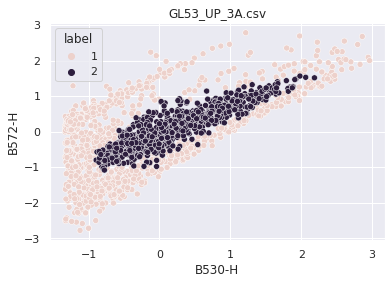

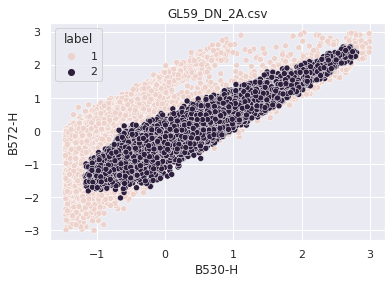

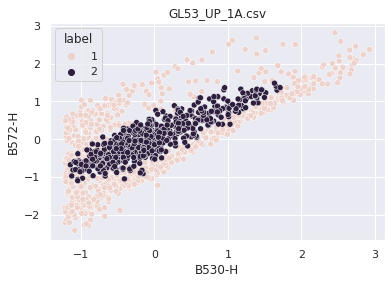

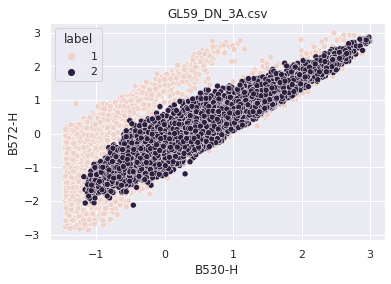

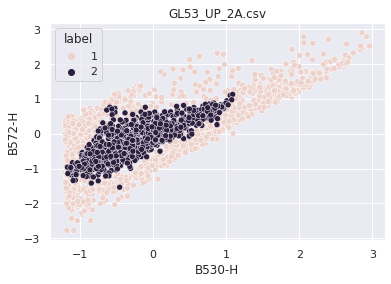

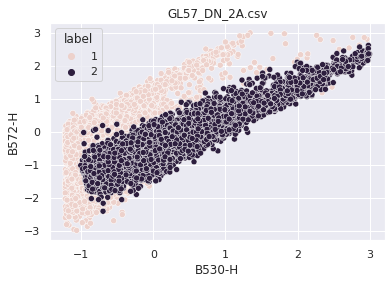

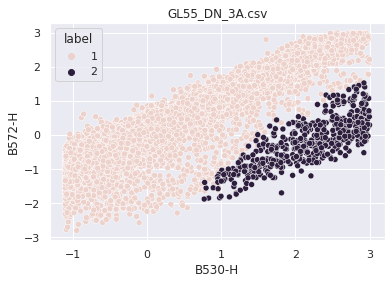

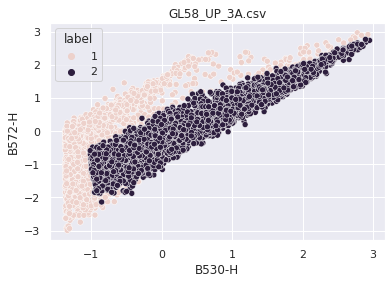

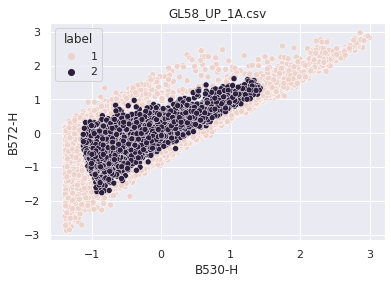

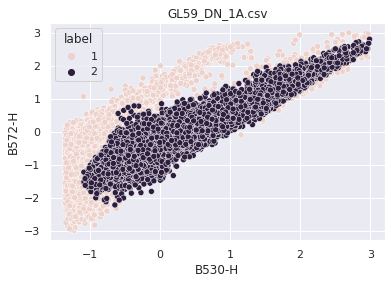

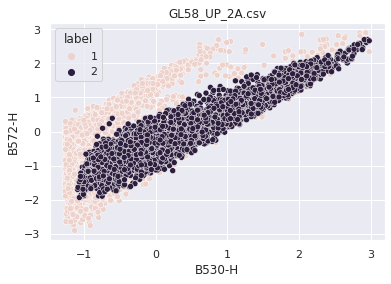

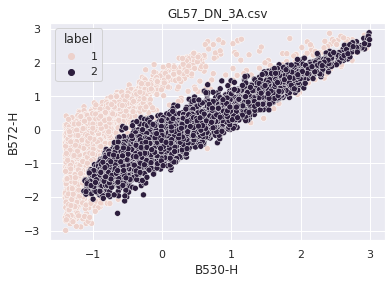

In [6]:
save_all_true(columns)

../labeled_dataset/GL53_UP_3A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL53_UP_3A.csv
(1729, 5)
F1-score: 0.158
Rand Index: 0.542
Adjusted Rand Index: 0.084
V-measure: 0.058
silhouette score: 0.397
../labeled_dataset/GL59_DN_2A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL59_DN_2A.csv
(14689, 5)
F1-score: 0.255
Rand Index: 0.540
Adjusted Rand Index: 0.080
V-measure: 0.085
silhouette score: 0.405
../labeled_dataset/GL53_UP_1A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL53_UP_1A.csv
(1359, 5)
F1-score: 0.397
Rand Index: 0.501
Adjusted Rand Index: -0.001
V-measure: 0.000
silhouette score: 0.452
../labeled_dataset/GL59_DN_3A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL59_DN_3A.csv
(13424, 5)
F1-score: 0.057
Rand Index: 0.573
Adjusted Rand Index: 0.146
V-measure: 0.146
silhouette score: 0.417
../labeled_dataset/GL53_UP_2A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../label

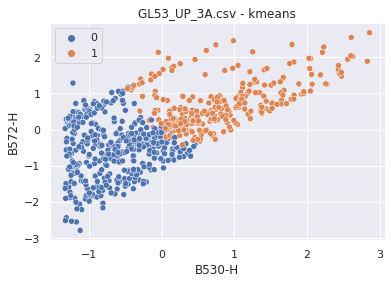

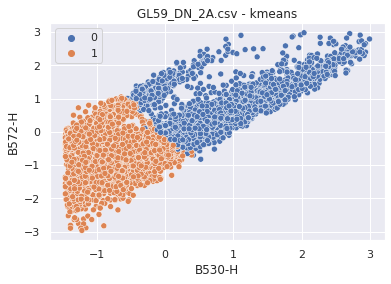

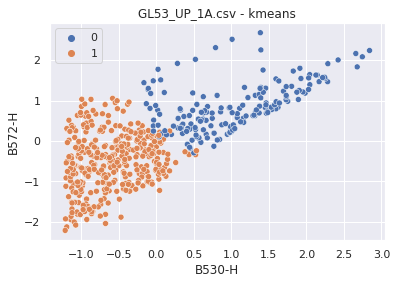

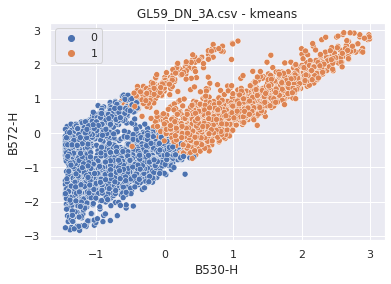

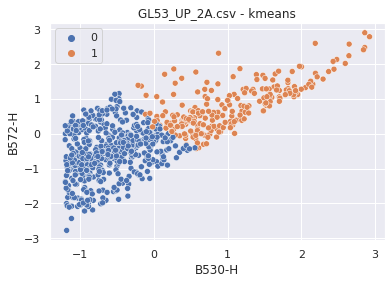

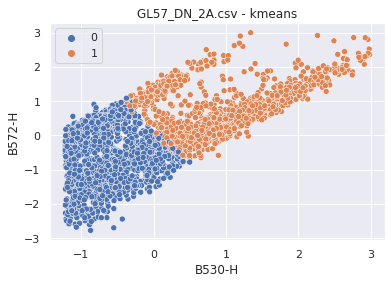

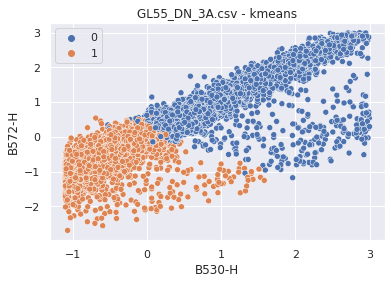

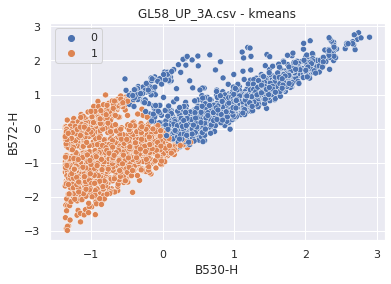

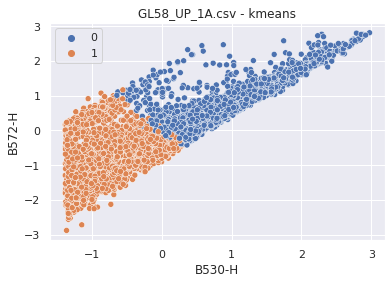

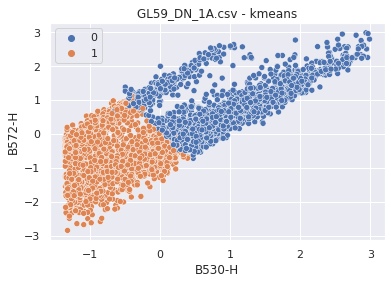

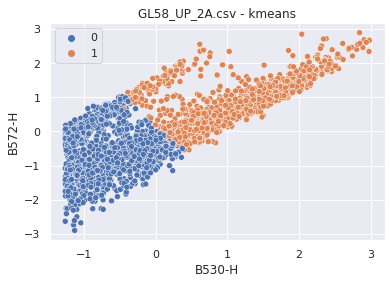

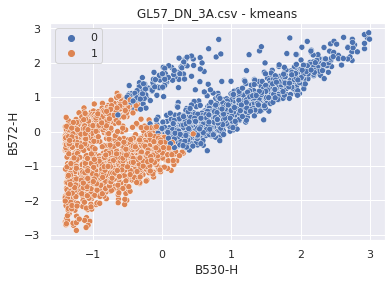

In [7]:
run_all(columns,clustering="kmeans")

../labeled_dataset/GL53_UP_3A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL53_UP_3A.csv
(1729, 5)
F1-score: 0.013
Rand Index: 0.502
Adjusted Rand Index: 0.005
V-measure: 0.189
silhouette score: -0.285
../labeled_dataset/GL59_DN_2A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL59_DN_2A.csv
(14689, 5)
F1-score: 0.001
Rand Index: 0.509
Adjusted Rand Index: -0.004
V-measure: 0.117
silhouette score: -0.577
../labeled_dataset/GL53_UP_1A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL53_UP_1A.csv
(1359, 5)
F1-score: 0.009
Rand Index: 0.512
Adjusted Rand Index: 0.034
V-measure: 0.187
silhouette score: -0.209
../labeled_dataset/GL59_DN_3A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL59_DN_3A.csv
(13424, 5)
F1-score: 0.001
Rand Index: 0.520
Adjusted Rand Index: 0.008
V-measure: 0.119
silhouette score: -0.609
../labeled_dataset/GL53_UP_2A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../l

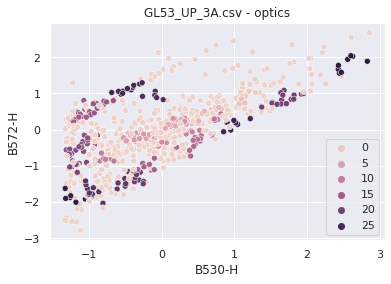

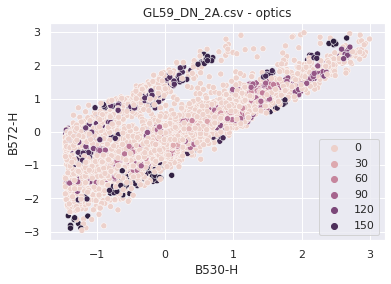

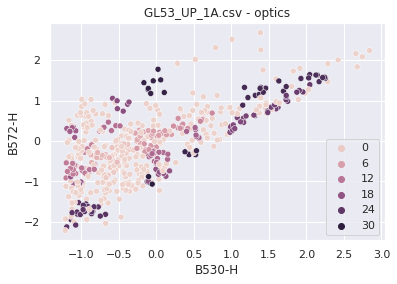

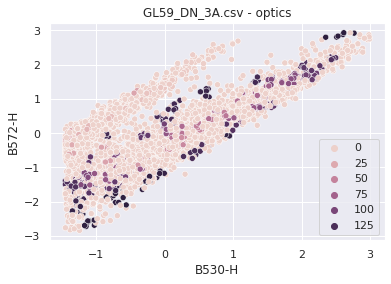

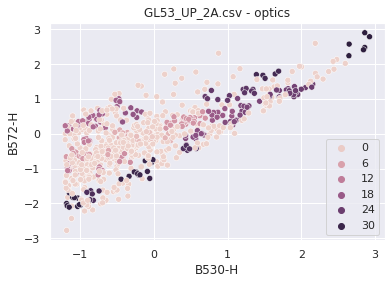

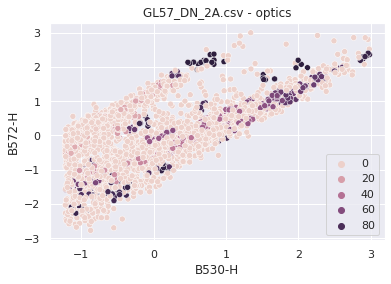

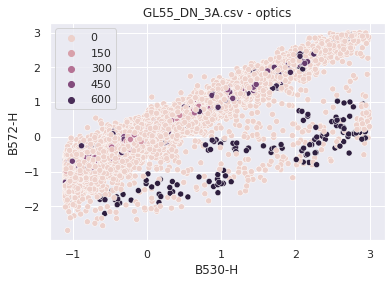

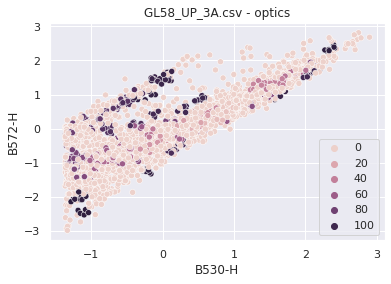

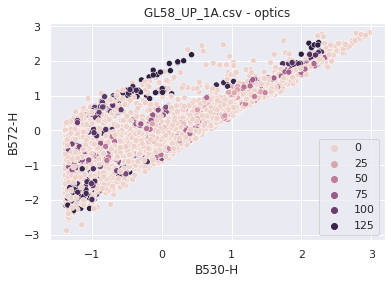

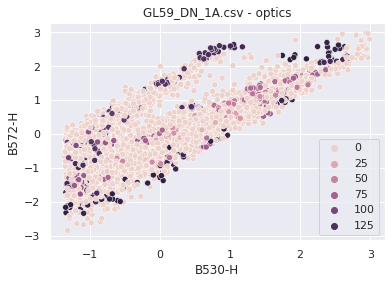

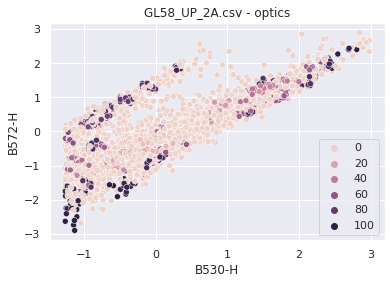

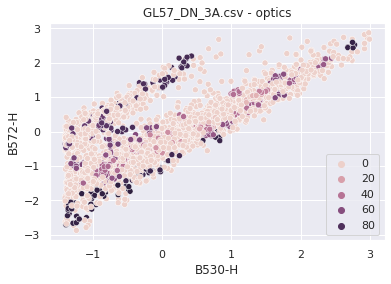

In [8]:
run_all(columns,clustering="optics")

../labeled_dataset/GL53_UP_3A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL53_UP_3A.csv
(1729, 5)
F1-score: 0.152
Rand Index: 0.595
Adjusted Rand Index: 0.189
V-measure: 0.141
silhouette score: 0.354
../labeled_dataset/GL59_DN_2A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL59_DN_2A.csv
(14689, 5)
F1-score: 0.301
Rand Index: 0.713
Adjusted Rand Index: 0.425
V-measure: 0.359
silhouette score: 0.344
../labeled_dataset/GL53_UP_1A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL53_UP_1A.csv
(1359, 5)
F1-score: 0.371
Rand Index: 0.504
Adjusted Rand Index: 0.006
V-measure: 0.003
silhouette score: 0.372
../labeled_dataset/GL59_DN_3A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL59_DN_3A.csv
(13424, 5)
F1-score: 0.020
Rand Index: 0.734
Adjusted Rand Index: 0.467
V-measure: 0.410
silhouette score: 0.372
../labeled_dataset/GL53_UP_2A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labele

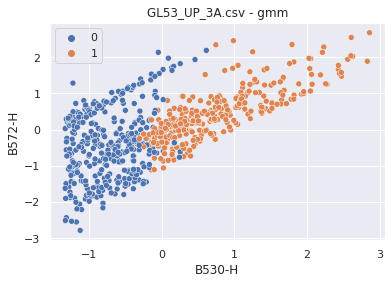

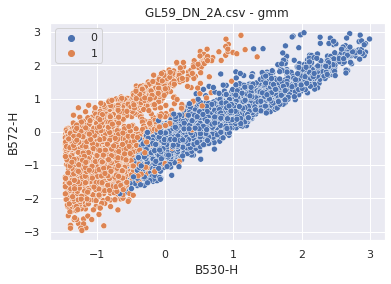

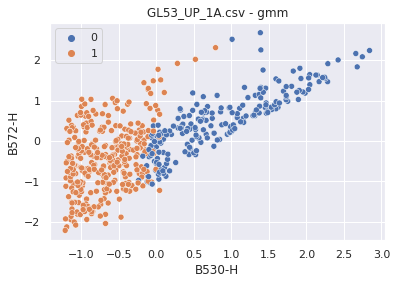

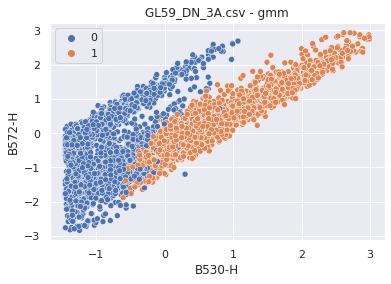

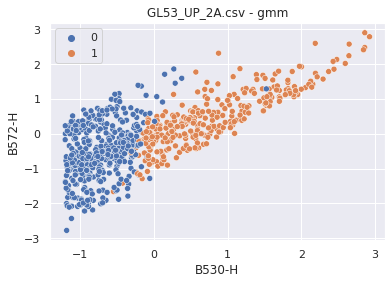

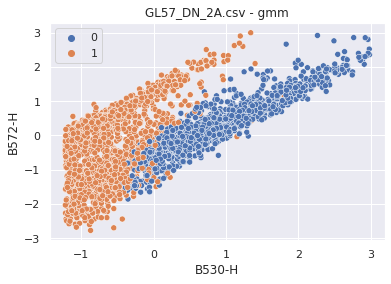

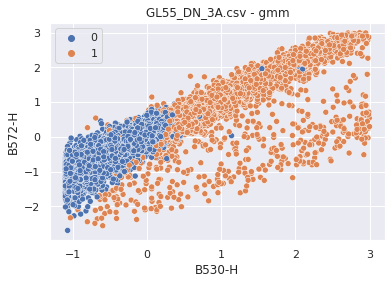

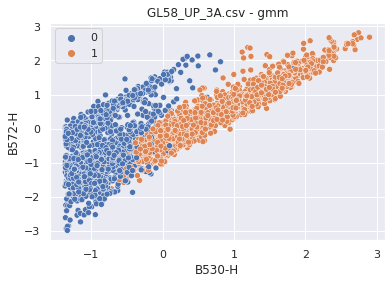

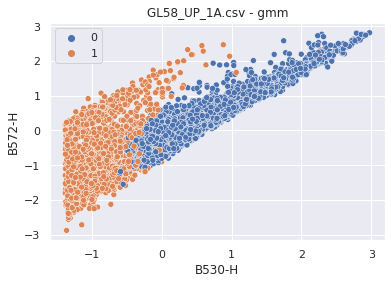

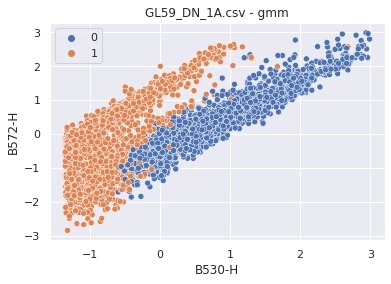

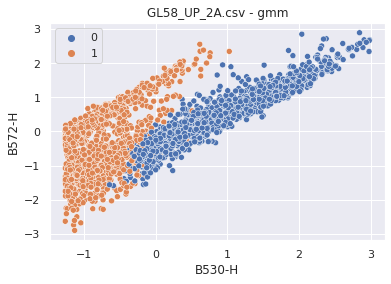

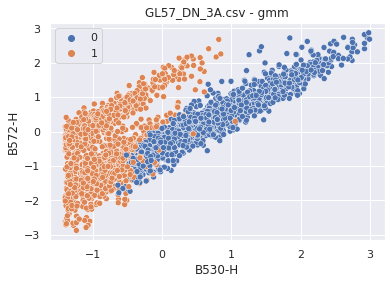

In [9]:
run_all(columns,clustering="gmm")

../labeled_dataset/GL53_UP_3A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL53_UP_3A.csv
(1729, 5)
F1-score: 0.000
Rand Index: 0.822
Adjusted Rand Index: 0.643
V-measure: 0.533
silhouette score: 0.116
../labeled_dataset/GL59_DN_2A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL59_DN_2A.csv
(14689, 5)
F1-score: 0.000
Rand Index: 0.564
Adjusted Rand Index: 0.041
V-measure: 0.053
silhouette score: 0.409
../labeled_dataset/GL53_UP_1A.csv
/home/mika/Documents/EPFL/Master/PdS/Notebooks/../labeled_dataset/GL53_UP_1A.csv
(1359, 5)
F1-score: 0.000
Rand Index: 0.515
Adjusted Rand Index: 0.000
V-measure: 0.000


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

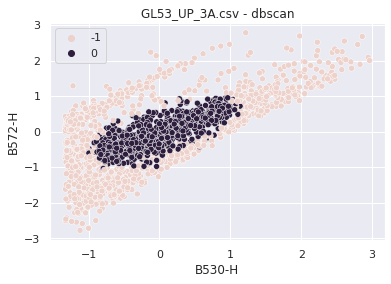

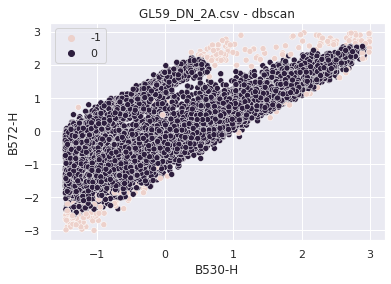

In [7]:
run_all(columns,clustering="dbscan")

### DBSCAN

In [11]:
labels = clusterDBSCAN(X)

In [12]:
y_pred = labels
y_true = y.to_list()

run_eval(X,y_true,y_pred)

TypeError: Expected sequence or array-like, got <class 'sklearn.cluster._dbscan.DBSCAN'>

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [ ]:
labels_true = y.to_list()
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
#print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
#print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
#print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("F1-score: %0.3f"
      % f1_score(labels_true, labels, average='micro'))
print("Rand Index: %0.3f"
      % metrics.rand_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
#print("Adjusted Mutual Information: %0.3f"
#      % metrics.adjusted_mutual_info_score(labels_true, labels))
#print("Silhouette Coefficient: %0.3f"
#      % metrics.silhouette_score(X, labels))

## K means

In [ ]:
#run_all_Kmeans(columns)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
labels = kmeans.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [ ]:
labels_true = y.to_list()
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
#print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
#print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
#print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("F1-score: %0.3f"
      % f1_score(labels_true, labels, average='micro'))
print("Rand Index: %0.3f"
      % metrics.rand_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
#print("Adjusted Mutual Information: %0.3f"
#      % metrics.adjusted_mutual_info_score(labels_true, labels))
#print("Silhouette Coefficient: %0.3f"
#      % metrics.silhouette_score(X, labels))

### GMM


In [ ]:
labels = clusterGMM(X)

y_pred = labels
y_true = y.to_list()


print("F1-score: %0.3f"
      % f1_score(y_true, y_pred, average='micro'))
print("Rand Index: %0.3f"
      % metrics.rand_score(y_true, y_pred))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y_true, y_pred))


### OPTICS


In [ ]:
labels = clusterOPTICS(X)

y_pred = labels
y_true = y.to_list()


print("F1-score: %0.3f"
      % f1_score(y_true, y_pred, average='micro'))
print("Rand Index: %0.3f"
      % metrics.rand_score(y_true, y_pred))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y_true, y_pred))


## FlowGrid

In [15]:
run_FlowGrid(nbins=2,eps=1.2,isEvaluation=True)

In [16]:
output_labels = np.genfromtxt('fc_data_FlowGrid_label.csv', delimiter=',')

In [17]:
print(output_labels.shape)
print(X.shape)
print(y.shape)

(7847,)
(1873, 5)
(1873,)


<AxesSubplot:xlabel='B530-H', ylabel='B572-H'>

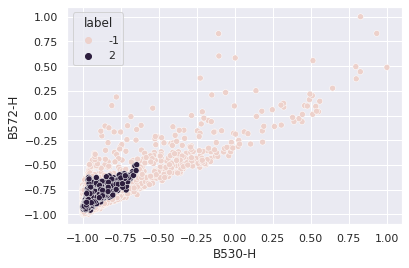

In [18]:
sns.scatterplot(data=X, x="B530-H", y="B572-H", hue=y)

In [19]:
X = X.drop([0])
y = y.drop([0])

In [23]:
sns.scatterplot(data=X, x="B530-H", y="B572-H", hue=output_labels)

ValueError: Length of ndarray vectors must match length of `data` when both are used, but `data` has length 1872 and the vector passed to `hue` has length 7847.

## Evaluation

In [ ]:
y_true = y.to_list()
y_pred = output_labels.tolist()

In [ ]:
unique, counts = np.unique(y, return_counts=True)
print("True label"+str(dict(zip(unique, counts))))
unique, counts = np.unique(output_labels, return_counts=True)
print("FlowGrid label"+str(dict(zip(unique, counts))))

### F1 score

Provide a value between 0 and 1 for each cluster, with 1 indicating a perfect reproduction of the corresponding manually gated population. Since we want to match clusters to reference population (manually gated clusters), we have to change a bit the methodology and use an algorithm called the “Hungarian assignment algorithm” which solves the assignment problem by finding a one-to-one mapping that maximizes the sum of F1-scores across reference population.


Hungarian assigment would come during the mapping (clustering algorithm) and is not yet implemented

In [ ]:
f1_score(y_true, y_pred, average='micro') #micro because class imbalance https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin

### RI

The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.


Perfectly matching labelings have a score of 1 even.
Labelings that assign all classes members to the same clusters are complete but may not always be pure, hence penalized:

In [ ]:
rand_score(y_true, y_pred)

### ARI

The raw RI score is then “adjusted for chance” into the ARI score using the following scheme:

ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)

The adjusted Rand index is thus ensured to have a value close to 0.0 for random labeling independently of the number of clusters and samples and exactly 1.0 when the clusterings are identical (up to a permutation).

(Similarity score between -1.0 and 1.0. Random labelings have an ARI close to 0.0. 1.0 stands for perfect match.)

In [ ]:
adjusted_rand_score(y_true,y_pred)

### Crossvalidation with DBSCAN

In [ ]:
from sklearn.metrics import homogeneity_score, make_scorer

def score_func(y_true, y_pred, **kwargs):
    return homogeneity_score(y_true, y_pred)
scorer = make_scorer(score_func)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import DBSCAN

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)


model = DBSCAN(n_jobs=-1)

param_grid = {"min_samples":np.arange(10),
             "eps":[1.1,1.2]}

grid = GridSearchCV(estimator=model, param_grid=param_grid,scoring=scorer, cv=3)


In [ ]:
#grid_result = grid.fit(X_train, y_train)


## Let's try another file

In [ ]:
file = '../labeled_dataset/GL59_DN_2A.csv'
columns=['FSC-H', 'SSC-H', 'B530-H', 'B675-H','Width']
X,y = preprocess(file,columns)